In [1]:
import pandas as pd
df = pd.read_csv('sales_data_correlated.csv')
df.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Quantity Ordered
0,176633,Flatscreen TV,13.69,2023-01-01,"492 Main St, Phoenix, AZ",4
1,176592,Wired Headphones,13.28,2023-01-02,"910 Main St, Dallas, TX",4
2,176655,Macbook Pro Laptop,14.27,2023-01-03,"345 Main St, Portland, OR",4
3,176586,Flatscreen TV,15.77,2023-01-04,"275 Main St, Los Angeles, CA",3
4,176626,Google Phone,12.30,2023-01-05,"138 Main St, San Francisco, CA",4


In [2]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [4]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Day of Week'] = df['Order Date'].dt.day_name()
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Quantity Ordered,Year,Month,Day,Day of Week,Hour
0,176633,Flatscreen TV,13.69,2023-01-01,"492 Main St, Phoenix, AZ",4,2023,1,1,Sunday,0
1,176592,Wired Headphones,13.28,2023-01-02,"910 Main St, Dallas, TX",4,2023,1,2,Monday,0
2,176655,Macbook Pro Laptop,14.27,2023-01-03,"345 Main St, Portland, OR",4,2023,1,3,Tuesday,0
3,176586,Flatscreen TV,15.77,2023-01-04,"275 Main St, Los Angeles, CA",3,2023,1,4,Wednesday,0
4,176626,Google Phone,12.30,2023-01-05,"138 Main St, San Francisco, CA",4,2023,1,5,Thursday,0


In [5]:
df.set_index('Order Date', inplace=True)
df.head()

,Order ID,Product,Price Each,Purchase Address,Quantity Ordered,Year,Month,Day,Day of Week,Hour
Order Date,,,,,,,,,,
2023-01-01,176633,Flatscreen TV,13.69,"492 Main St, Phoenix, AZ",4,2023,1,1,Sunday,0
2023-01-02,176592,Wired Headphones,13.28,"910 Main St, Dallas, TX",4,2023,1,2,Monday,0
2023-01-03,176655,Macbook Pro Laptop,14.27,"345 Main St, Portland, OR",4,2023,1,3,Tuesday,0
2023-01-04,176586,Flatscreen TV,15.77,"275 Main St, Los Angeles, CA",3,2023,1,4,Wednesday,0
2023-01-05,176626,Google Phone,12.30,"138 Main St, San Francisco, CA",4,2023,1,5,Thursday,0


In [7]:
monthly_sales = df['Quantity Ordered'].resample('ME').sum()
print(monthly_sales)

Order Date
2023-01-31    53
2023-02-28    10
2023-03-31     0
2023-04-30     0
Freq: ME, Name: Quantity Ordered, dtype: int64


In [8]:
df['Days Since Last Order'] = df.index.to_series().diff().dt.days

In [9]:
df.head()

,Order ID,Product,Price Each,Purchase Address,Quantity Ordered,Year,Month,Day,Day of Week,Hour,Days Since Last Order
Order Date,,,,,,,,,,,
2023-01-01,176633,Flatscreen TV,13.69,"492 Main St, Phoenix, AZ",4,2023,1,1,Sunday,0,NaN
2023-01-02,176592,Wired Headphones,13.28,"910 Main St, Dallas, TX",4,2023,1,2,Monday,0,1.0
2023-01-03,176655,Macbook Pro Laptop,14.27,"345 Main St, Portland, OR",4,2023,1,3,Tuesday,0,1.0
2023-01-04,176586,Flatscreen TV,15.77,"275 Main St, Los Angeles, CA",3,2023,1,4,Wednesday,0,1.0
2023-01-05,176626,Google Phone,12.30,"138 Main St, San Francisco, CA",4,2023,1,5,Thursday,0,1.0


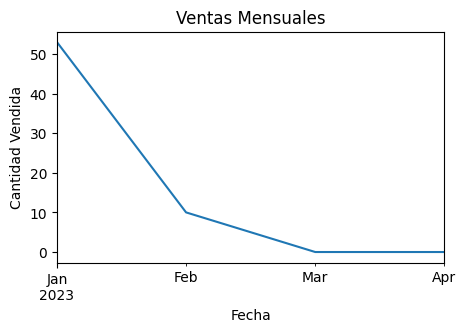

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
monthly_sales.plot()
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

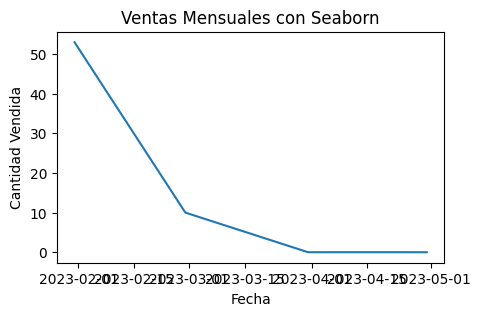

In [11]:
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.lineplot(data=monthly_sales)

plt.title('Ventas Mensuales con Seaborn')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose


ModuleNotFoundError: No module named 'statsmodels'

In [13]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 17.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

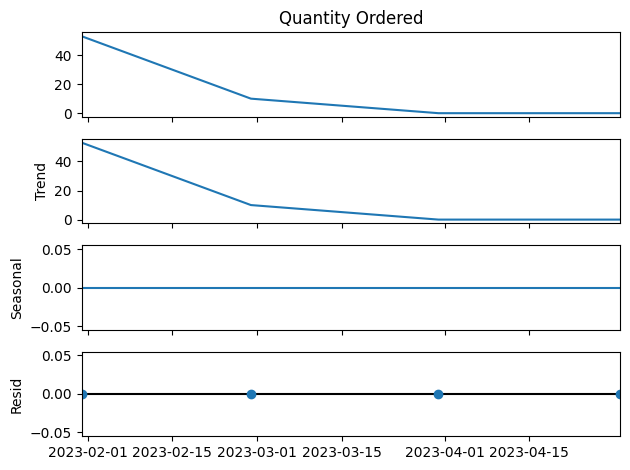

In [17]:
decomposition = seasonal_decompose(monthly_sales, model='additive', period=1)
decomposition.plot()
plt.show()

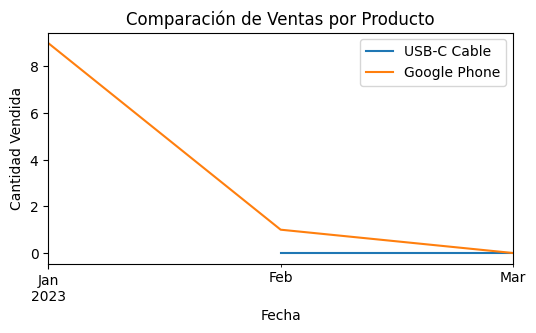

In [19]:
plt.figure(figsize=(6, 3))
df[df['Product'] == 'USB-C Charging Cable']['Quantity Ordered'].resample('ME').sum().plot(label='USB-C Cable')
df[df['Product'] == 'Google Phone']['Quantity Ordered'].resample('ME').sum().plot(label='Google Phone')
plt.title('Comparación de Ventas por Producto')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()